# Filtro de Moderação de Conteúdo com Python e IA



In [1]:
import os  # Importa o módulo 'os', que permite interagir com variáveis de ambiente do sistema operacional.

# Define a variável de ambiente 'TWITTER_CONSUMER_KEY' com a chave de acesso da API do Twitter.
os.environ["TWITTER_CONSUMER_KEY"] = "HIDDEN"

# Define a variável de ambiente 'TWITTER_CONSUMER_SECRET' com o segredo de acesso da API do Twitter.
os.environ["TWITTER_CONSUMER_SECRET"] = "HIDDEN"

# Define a variável de ambiente 'OPENAI_API_KEY' com a chave de acesso da API da OpenAI.
os.environ["OPENAI_API_KEY"] = "HIDDEN"

## Passo 1: Consumir Tweets (**E**xtract)
Nesta etapa, utilizaremos a API do Twitter para coletar tweets de um determinado username. Isso envolve autenticar com o Twitter e fazer duas requisições GET, primeiro para obter os dados do Usuário do Twitter e depois seus respectivos Tweets.

### Reflexão
A escolha de utilizar a API do Twitter é interessante para acessar dados em tempo real e de forma estruturada. A autenticação é um passo importante para garantir a segurança e conformidade com as diretrizes da API.

Por outro lado, para que isso não impacte os seus estudos (devido ao alto custo), existe a alternativa de mockar os dados (criando tweets fictícios para moderação). Isso não invalida de maneira alguma esta experiência educacional, abstraia a API do Twitter como uma mera fonte de dados, blz!?


### Alternativa Sem Custos: Mockar os Tweets

In [2]:
# Alternativa Sem Custos: Mockar os Tweets (ou qualquer tipo de conteúdo passível de moderação).

# Cria uma lista chamada 'tweets' contendo mensagens de exemplo.
# Essas mensagens simulam tweets reais, úteis para testar o sistema sem precisar de integração direta com o Twitter.
tweets = [
  "Java é vida, delicinha demais!",  # Tweet elogiando Java.
  "O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)",  # Crítica brincalhona ao código de alguém.
  "Chorando sangue aqui pra aprender Kotlin, mas vou conseguir :D",  # Comentário sobre a dificuldade de aprender Kotlin.
  "Se amar é crime, então eu sou traficante!",  # Frase de humor exagerado sobre amor.
  "Netão, ladrão! Roubou meu coração <3",  # Frase de brincadeira amorosa com o 'Netão'.
  "A voz do João é muito sensual, parabéns!"  # Elogio à voz de uma pessoa chamada João.
]

### Alternativa Com Custos: [API do Twitter](https://developer.twitter.com/en/products/twitter-api) ($100/mês)

In [ ]:
# Alternativa Com Custos: API do Twitter ($100/mês)
# https://developer.twitter.com/en/products/twitter-api

import requests  # Importa a biblioteca 'requests' para fazer requisições HTTP.
import os  # Importa o módulo 'os' para acessar variáveis de ambiente.

def get_bearer_token(consumer_key, consumer_secret):
  """
  Autentica com a API do Twitter e retorna o token de acesso.
  Documentação OAuth2: https://developer.twitter.com/en/docs/authentication/api-reference/token
  """
  try:
    # Envia uma requisição POST para obter o token de acesso (bearer token).
    response = requests.post(
      "https://api.twitter.com/oauth2/token",
      auth=(consumer_key, consumer_secret),  # Autenticação usando a chave e o segredo do consumidor.
      headers={"Content-Type": "application/x-www-form-urlencoded;charset=UTF-8"},
      data={"grant_type": "client_credentials"}
    )
    response.raise_for_status()  # Lança um erro se a resposta indicar falha.
    return response.json()["access_token"]  # Retorna o token de acesso extraído do JSON da resposta.
  except requests.RequestException as e:
    # Em caso de erro na requisição, lança uma exceção com uma mensagem descritiva.
    raise Exception(f"Erro na autenticação com a API do Twitter: {e}")

def get_tweets_by_username(bearer_token, username):
  """
  Busca a timeline de tweets de um usuário específico em 2 passos:
  1. Obter o ID do usuário pelo nome de usuário.
  2. Buscar os tweets usando o ID do usuário.
  Documentação Users: https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference
  Documentação Tweets: https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/api-reference
  """
  try:
    headers = {"Authorization": f"Bearer {bearer_token}"}  # Cabeçalho de autorização com o bearer token.

    # Primeiro passo: busca o ID do usuário com base no nome de usuário.
    user_response = requests.get(
      f"https://api.twitter.com/2/users/by/username/{username}",
      headers=headers
    )
    user_response.raise_for_status()
    user_id = user_response.json()['data']['id']  # Extrai o ID do usuário da resposta.

    # Segundo passo: busca os tweets usando o ID do usuário.
    tweets_response = requests.get(
      f"https://api.twitter.com/2/users/{user_id}/tweets",
      headers=headers
    )
    tweets_response.raise_for_status()
    return tweets_response.json()  # Retorna o JSON com os tweets.
  except requests.RequestException as e:
    # Em caso de erro na requisição, lança uma exceção com uma mensagem descritiva.
    raise Exception(f"Erro ao buscar tweets: {e}")

# Captura as chaves da API do Twitter das variáveis de ambiente.
consumer_key = os.environ['TWITTER_CONSUMER_KEY']
consumer_secret = os.environ['TWITTER_CONSUMER_SECRET']

# Exemplo de uso:
# 1. Obtém o bearer token usando as credenciais do consumidor.
bearer_token = get_bearer_token(consumer_key, consumer_secret)

# 2. Busca os tweets de um usuário específico (exemplo: 'dio_me_').
tweets_response = get_tweets_by_username(bearer_token, "dio_me_")

# 3. Extrai apenas o texto dos tweets e imprime um por linha.
tweets = [tweet['text'] for tweet in tweets_response['data']]
print("\n".join(tweets))

## Passo 2: Moderar Tweets (**T**ransform)
Após coletar os tweets, usaremos a API da OpenAI (ou o pysentimiento) para moderar o conteúdo. O objetivo é identificar postagens inapropriadas com base em categorias predefinidas. Posteriormente, prepararemos os dados para visualização.

### Reflexão
A moderação automática de conteúdo via IA destaca a importância da responsabilidade ética no uso de tecnologias de inteligência artificial. Nesse sentido, o conceito de Porcessamento de Linguagem Natural (NPL) é fundamental para tais análises e categorizações.




### Alternativa Sem Custo: [pysentimiento](https://github.com/pysentimiento/pysentimiento)

In [4]:
# Instala a biblioteca pysentimiento, que fornece analisadores de texto prontos para tarefas como detecção de discurso de ódio.
!pip install pysentimiento

# Importa a função para criar um analisador.
from pysentimiento import create_analyzer

# Cria um analisador de discurso de ódio em português.
# Task disponível: "hate_speech", com suporte a vários idiomas (aqui 'pt' = português).
analyzer = create_analyzer(task="hate_speech", lang="pt")

def moderate_text(text):
  """
  Modera o texto passado como argumento, utilizando o analisador de hate speech.

  Retorna:
    - 'flagged': booleano indicando se o texto foi identificado como discurso de ódio.
    - 'categories': dicionário contendo as probabilidades para cada categoria (por exemplo: HATE, OFFENSIVE, NEUTRAL).
  """
  # Realiza a predição usando o modelo treinado para detectar discurso de ódio.
  moderation = analyzer.predict(text)

  # Define se o texto deve ser marcado como problemático:
  # Se a saída for uma string (sentimento), checa se é negativa ('NEG').
  # Se a saída for uma lista de categorias (hate speech), considera flagged se houver qualquer categoria detectada.
  flagged = moderation.output == 'NEG' if isinstance(moderation.output, str) else len(moderation.output)

  # Retorna o resultado da moderação contendo se foi flagrado e as probabilidades por categoria.
  return {
    "flagged": flagged,
    "categories": moderation.probas
  }

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/936 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/504k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

### Alternativa Paga: API da OpenAI

In [ ]:
# Função para moderar um texto usando a API de moderação da OpenAI
def moderate_text(text):
  try:
    # Define os headers da requisição, usando a API Key da OpenAI armazenada nas variáveis de ambiente
    headers = {"Authorization": f"Bearer {os.getenv('OPENAI_API_KEY')}"}

    # Envia uma requisição POST para a API de moderação da OpenAI
    response = requests.post(
      "https://api.openai.com/v1/moderations",
      headers=headers,
      json={"input": text}
    )

    # Se houver erro na resposta HTTP (ex: status 400, 403, 500), lança uma exceção
    response.raise_for_status()

    # Extrai o primeiro resultado do JSON de resposta
    moderation = response.json()["results"][0]

    # Retorna se o texto foi flagrado (flagged = True ou False)
    # E também os scores por categoria (ex: hate, sexual, violence, etc.)
    return {
      "flagged": moderation['flagged'],
      "categories": moderation['category_scores']
    }

  except requests.RequestException as e:
    # Se der erro na requisição, lança uma Exception personalizada
    raise Exception(f"Erro no consumo da API da OpenAI: {e}")

### Moderar/Transformar Tweets

In [5]:
# Lista para armazenar os tweets moderados
moderated_tweets = []

# Percorre cada tweet individualmente
for tweet in tweets:
  # Aplica a moderação ao tweet
  moderation = moderate_text(tweet)

  # Cria um dicionário contendo o texto original e o resultado da moderação
  moderated_tweets.append({
    "text": tweet,
    "moderation": moderation
  })

# Imprime cada tweet moderado, um por linha
print(*moderated_tweets, sep="\n")

{'text': 'Java é vida, delicinha demais!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.006614838261157274, 'Body': 0.001889644656330347, 'Racism': 0.0030320726800709963, 'Ideology': 0.0022431528195738792, 'Homophobia': 0.0036706740502268076}}}
{'text': 'O código do @falvojr é porco demais, pelo amor de Deus! Brinks ;)', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.005629293620586395, 'Body': 0.0018805402796715498, 'Racism': 0.0032424202654510736, 'Ideology': 0.001985570415854454, 'Homophobia': 0.004264375194907188}}}
{'text': 'Chorando sangue aqui pra aprender Kotlin, mas vou conseguir :D', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.004081877414137125, 'Body': 0.0016914053121581674, 'Racism': 0.0036314274184405804, 'Ideology': 0.002016898477450013, 'Homophobia': 0.0067486390471458435}}}
{'text': 'Se amar é crime, então eu sou traficante!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.007734132464975119, 'Body': 0.001370156416669488, 'Racis

## Passo 3: Visualizar Dados (**L**oad)

Após a moderação dos tweets, a próxima etapa do nosso ETL (Extract, Transform, Load) envolve a visualização dos dados. Esta etapa é crucial para apresentar as informações de maneira clara e interativa, permitindo uma análise detalhada do conteúdo moderado.

Utilizamos o Pandas para organizar os dados e o Matplotlib para criar gráficos de barras representando as categorias de moderação de cada tweet. Cada gráfico destaca se o tweet foi marcado (flagged) como inapropriado, usando cores diferentes para uma distinção imediata. Este método visual ajuda a destacar rapidamente os tweets que requerem atenção especial.

### Reflexão
A visualização de dados é uma poderosa ferramenta para compreender grandes conjuntos de dados e extrair insights significativos. Ao visualizar o conteúdo moderado dos tweets, podemos identificar padrões, tendências e outliers de forma eficiente. Isso não apenas ajuda a avaliar a eficácia da moderação automática, mas também fornece uma perspectiva clara sobre o comportamento e as preferências dos usuários na plataforma.


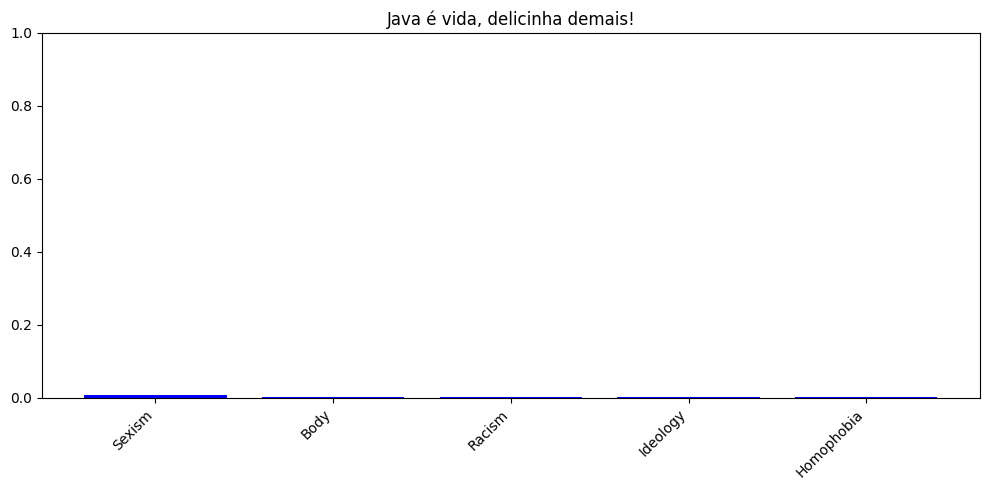

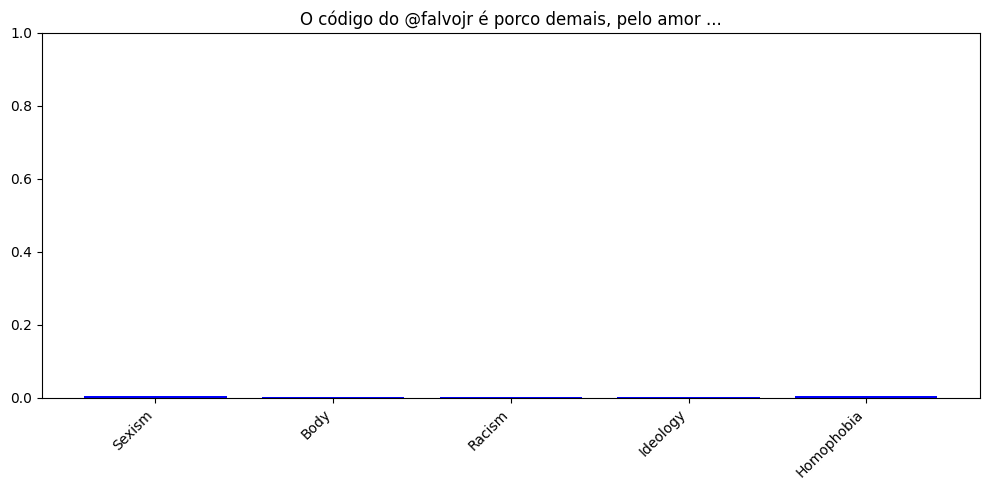

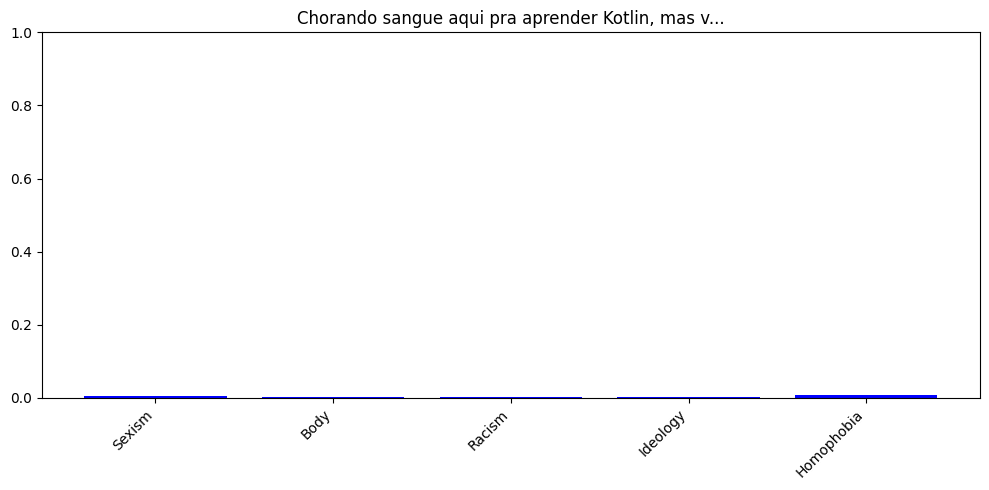

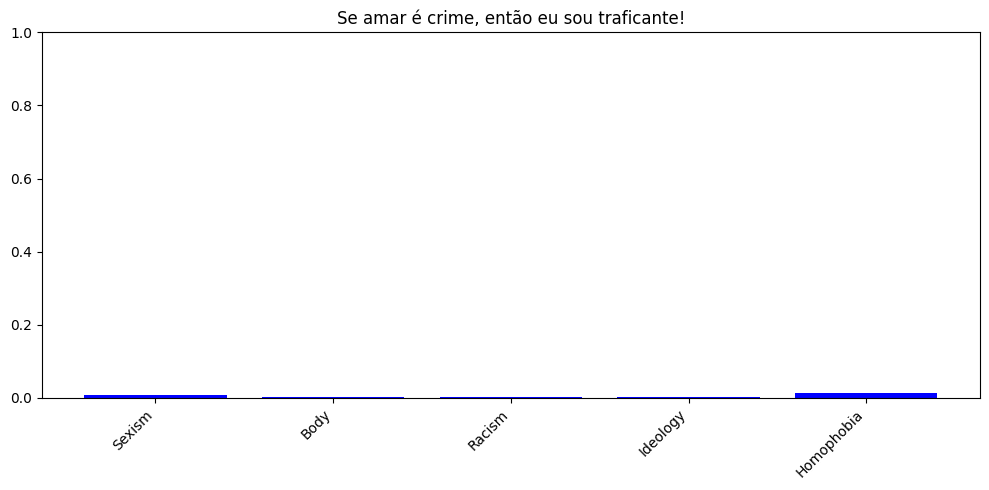

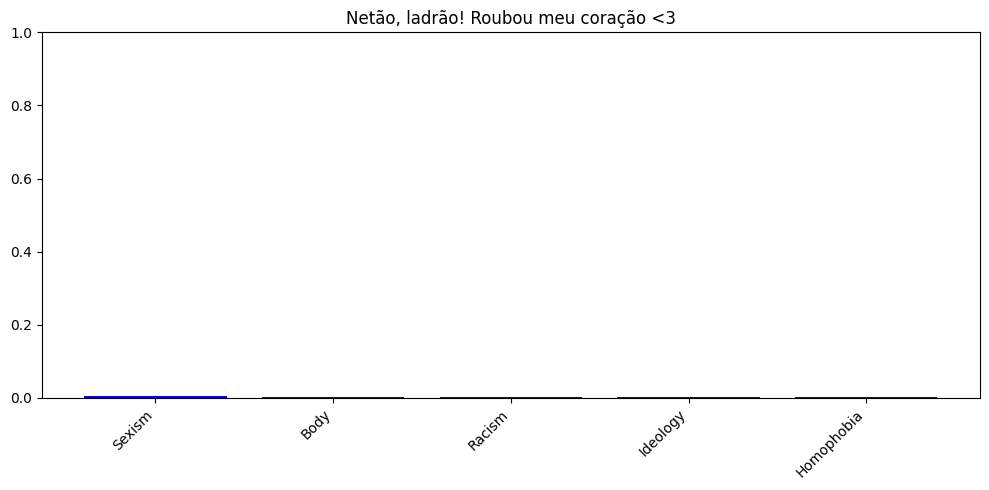

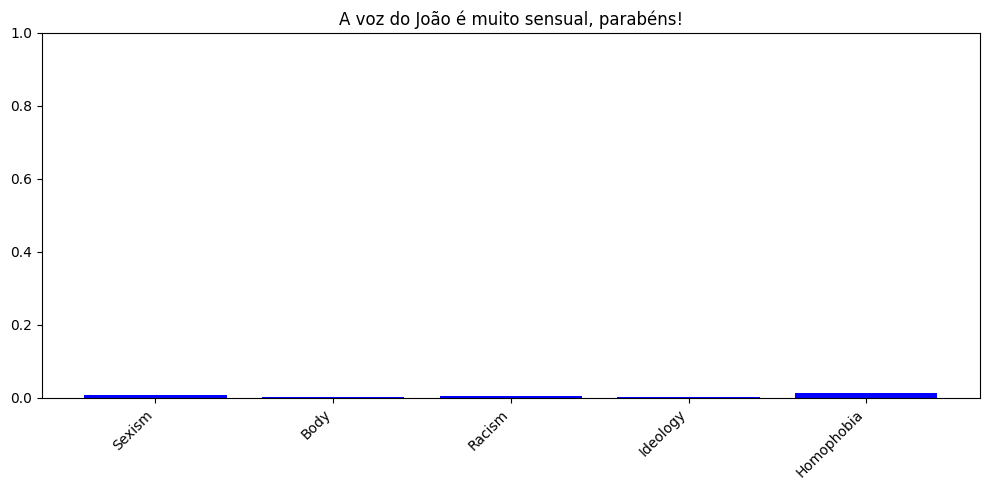

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um gráfico de barras para cada mensagem moderada
for i, tweet in enumerate(moderated_tweets):
  categories = tweet['moderation']['categories']
  flagged = tweet['moderation']['flagged']

  plt.figure(figsize=(10, 5))
  bars = plt.bar(categories.keys(), categories.values(), color='red' if flagged else 'blue')

  # Resumir o texto para o título (primeiros 50 caracteres)
  title = tweet["text"]
  if len(title) > 50:
    title = title[:47] + "..."

  plt.title(title)
  plt.xticks(rotation=45, ha="right")  # Melhor visualização nos eixos
  plt.ylim(0, 1)  # Valor máximo de 1
  plt.tight_layout()

  # Exibindo o gráfico
  plt.show()

In [8]:
import pandas as pd

# Lista para armazenar os dados
data = []

# Preenchendo a lista
for tweet in moderated_tweets:
  text = tweet["text"]
  moderation = tweet["moderation"]
  flagged = moderation["flagged"]

  # Pegando a categoria com maior score
  categories = moderation["categories"]
  max_category = max(categories, key=categories.get)
  max_score = categories[max_category]

  data.append({
    "texto": text,
    "flagged": flagged,
    "categoria_maior": max_category,
    "score_maior": max_score
  })

# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame
print(df)


                                               texto  flagged categoria_maior  \
0                     Java é vida, delicinha demais!        0          Sexism   
1  O código do @falvojr é porco demais, pelo amor...        0          Sexism   
2  Chorando sangue aqui pra aprender Kotlin, mas ...        0      Homophobia   
3          Se amar é crime, então eu sou traficante!        0      Homophobia   
4               Netão, ladrão! Roubou meu coração <3        0          Sexism   
5           A voz do João é muito sensual, parabéns!        0      Homophobia   

   score_maior  
0     0.006615  
1     0.005629  
2     0.006749  
3     0.012405  
4     0.005059  
5     0.013817  
